# Compare reflectivities from XOP and LBL

In [1]:
from astropy import units as u
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
# Readind LBL Data
'''
This corresponds to Ni Rho=8.902, Sig=0.nm, P=1., E=1000.eV
'''
Dir = './'
filename = 'Reflectivity_Nickel_01keV.txt'
header_list = ["Angle (deg)", "Reflectivity"]
lbl = pd.read_csv(Dir+filename,header=2,sep='\s+',names=header_list)

# Readind XOP Data [Windt model]
'''
This corresponds to Ni Rho=8.902\AA, P=0., E=1000.eV
'''
file_unpol= 'unpol.txt'
unpol = pd.read_csv(Dir+file_unpol,sep='\s+',names=header_list)

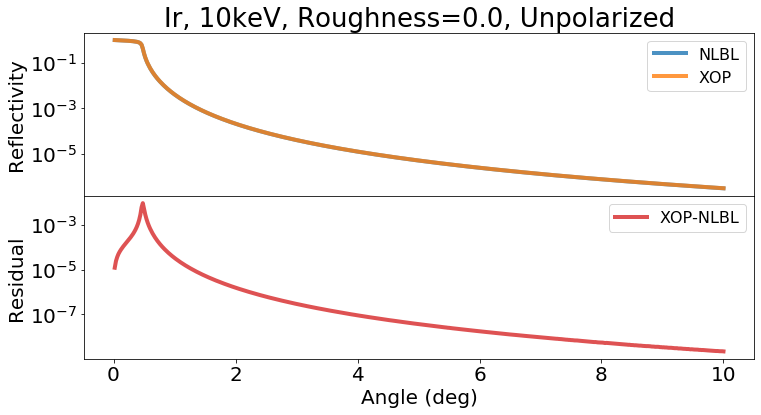

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,6))
fig.subplots_adjust(hspace=0)
axs[0].set_title('Ir, 10keV, Roughness=0.0, Unpolarized',fontsize=26)
axs[0].plot(lbl[lbl.keys()[0]],lbl[lbl.keys()[1]],label='NLBL',linewidth=4,alpha=.8,
       color='tab:blue')
axs[0].plot(unpol[unpol.keys()[0]] * u.milliradian.to('deg'),unpol[unpol.keys()[1]],
       label='XOP',linewidth=4,alpha=.8,linestyle='-',color='tab:orange')
axs[0].legend(fontsize=16)
axs[0].set_ylabel(lbl.keys()[1],fontsize=20)
axs[0].set_yscale('log')
axs[0].tick_params(labelsize=20)
axs[1].plot(lbl[lbl.keys()[0]],unpol[unpol.keys()[1]]-lbl[lbl.keys()[1]],label='XOP-NLBL',linewidth=4,alpha=.8,
       color='tab:red')
axs[1].set_xlabel(lbl.keys()[0],fontsize=20)
axs[1].tick_params(labelsize=20,axis='y')
axs[1].tick_params(labelsize=20,axis='x')
axs[1].set_ylabel('Residual',fontsize=20)
axs[1].legend(fontsize=16)
axs[1].set_yscale('log')
#axs[1].ticklabel_format(axis='y',style='sci',scilimits=(0,-6))
plt.show()

# Create HDF5 file

## XOP, E=[1,100]keV, Ir, Theta=[0,10]degrees, Roughness=0.0

In [2]:
def HDF5_Creation(Emax,Dir,filename_Ir,filename_Ni,OutFile):
    header_list = ["Angle (mrad)", "Energy (eV)", "Reflectivity"]
    Ir = pd.read_csv(Dir+filename_Ir,header=2,sep='\s+',names=header_list)
    Ni = pd.read_csv(Dir+filename_Ni,header=2,sep='\s+',names=header_list)
    # Define Energy, Angles and Reflectivity for Ir and Ni
    Energy = np.arange(1,Emax+1) # in keV
    Angles = Ir[0:499]['Angle (mrad)'].values * u.milliradian.to('deg') #original file comes in mrad
    Reflectivity_Ir=[]
    Reflectivity_Ni=[]
    for i in Energy:
        Reflectivity_Ir.append(Ir[(i-1)*500:(i-1)*500+499]['Reflectivity'].values)
        Reflectivity_Ni.append(Ni[(i-1)*500:(i-1)*500+499]['Reflectivity'].values)

    # HDF5 File creation:
    #!rm OutFile # removes any existing mytestfile.hdf5 file
    f = h5py.File(OutFile, "w") # creates hdf5 with write permissions
    fenergy = f.create_dataset("energy", data=Energy) # load energy
    fangle = f.create_dataset("angle", data=Angles) # load angles list
    # load reflectivity for for Ir and Ni as HDF5 groups
    # http://docs.h5py.org/en/stable/high/group.html
    reflec_ir = f.create_dataset("reflectivity/ir", data=np.array(Reflectivity_Ir))
    reflec_ni = f.create_dataset("reflectivity/ni", data=np.array(Reflectivity_Ni))
    f.close()

In [24]:
Dir = './'
filename_Ir = 'Ir.txt'
filename_Ni = 'Ni.txt'
OutFile = "reflectivity_data_100keV.hdf5"
HDF5_Creation(100,Dir,filename_Ir,filename_Ni,OutFile)

In [23]:
# For sanity check:
Dir = './'
filename_Ir = 'Ir_30.txt'
filename_Ni = 'Ni_30.txt'
OutFile = "reflectivity_data_30keV.hdf5"
HDF5_Creation(30,Dir,filename_Ir,filename_Ni,OutFile)

In [17]:
f30 = h5py.File('reflectivity_data_30keV.hdf5','r') ## Object Dictionary-like.

In [21]:
f30['reflectivity/ir'][()][:,0]

array([0.992303, 0.986551, 0.979161, 0.982458, 0.984399, 0.985746,
       0.98676 , 0.987541, 0.988133, 0.988515, 0.988253, 0.973811,
       0.965138, 0.964941, 0.967061, 0.968614, 0.969896, 0.971012,
       0.972   , 0.972895, 0.973711, 0.974459, 0.975151, 0.975796,
       0.976393, 0.976955, 0.977477, 0.97797 , 0.978435, 0.978861])

In [22]:
f30['angle'][()]

array([ 0.04000002,  0.06000014,  0.07999981,  0.10000004,  0.12000028,
        0.13999995,  0.16000018,  0.17999985,  0.20000009,  0.22000032,
        0.23999999,  0.26000023,  0.27999989,  0.30000013,  0.32000037,
        0.34000003,  0.36000027,  0.37999993,  0.40000017,  0.42000041,
        0.44000007,  0.46000031,  0.47999998,  0.50000021,  0.52000045,
        0.54000012,  0.56000035,  0.57999945,  0.6000014 ,  0.61999763,
        0.63999959,  0.66000154,  0.67999777,  0.69999973,  0.72000168,
        0.73999791,  0.75999987,  0.78000182,  0.79999805,  0.82000001,
        0.84000196,  0.85999819,  0.88000015,  0.9000021 ,  0.91999833,
        0.94000029,  0.96000224,  0.97999847,  1.00000043,  1.02000239,
        1.03999861,  1.06000057,  1.08000253,  1.09999875,  1.12000071,
        1.14000267,  1.15999889,  1.18000085,  1.20000281,  1.21999903,
        1.24000099,  1.26000295,  1.27999917,  1.30000113,  1.32000309,
        1.33999931,  1.36000127,  1.38000323,  1.39999945,  1.42

In [10]:
u.milliradian.to('deg')

0.057295779513082325

In [12]:
0.04*u.degree.to('milliradian')

0.6981317007977319

In [344]:
!rm mytestfile.hdf5 # removes any existing mytestfile.hdf5 file
f = h5py.File("mytestfile.hdf5", "w") # creates hdf5 with write permissions
arrir = np.arange(100)
arrni = np.arange(100)
dsetir = f.create_dataset("mydataset/ir", data=arrir)
dsetni = f.create_dataset("mydataset/ni", data=arrni)

In [348]:
f['mydataset/ir'].value

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])